## ANALISIS DE DATOS DE LLAMADA DE MESA DE SERVICIO ENTRE EL 17 Y EL 29 DE JULIO

### Objetivos

#### - Limpiar datos
#### - Graficar numero de llamados por dia
#### - Graficar consultas/areas mas frecuentes
#### - Graficar consultas/areas agrupadas por dia
#### - Graficar comparacion entre casos resueltos y derivados

<br>

Se importan los modulos de numpy y pandas para manejar los datos; y los modulos matplotlib y seaborn para realizar los graficos.

In [54]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### Limpieza de datos

Ante de importar el csv se eliminaron los datos personales del archivo, especificamente las columnas 'ID_ATENCION', 'RUT_CLIENTE', 'NOMBRE_CLIENTE', 'USUARIO_CREACION', 'USUARIO_ASIG', 'ESTADO_ATENCION', 'ESFUERZO', 'TIEMPO_RESOLUCION', 'OBSERVACION', 'OBSERVACION_CLIENTE'

La columna 'AREA' y 'SEDE' decidi eliminarlas ya que solo se tenian datos de la mesa de servicios de la sede Antonio Varas

Importamos el csv con los datos a un DataFrame de pandas 

In [55]:
call_csv_route = os.path.join("res","exporte_tickets_17al29.csv")
call_df = pd.read_csv(call_csv_route, engine="python", header=0, delimiter=";")

call_df.sample(5)

,FECHA_CREACION,CARRERA,NIVEL_1,NIVEL_2,NIVEL_3,NIVEL_4
219,27-07-2023 16:02,INGENIERÍA EN CONECTIVIDAD Y REDES,Académico,Información o convalidación,Prácticas,Resuelto
355,26-07-2023 18:40,INGENIERÍA EN COMERCIO EXTERIOR,Académico,Gestión académica,Contacto coordinador de carrera,Resuelto
325,26-07-2023 19:04,INGENIERÍA EN ADMINISTRACIÓN MENCIÓN FINANZAS ...,Tecnología,Gestión de cuentas,Cuenta alumno continuidad,Derivación G-Desk
339,26-07-2023 18:48,TURISMO Y HOTELERÍA,Inscripción de asign,Información del proceso,Uso plataforma IA,Resuelto
767,26-07-2023 12:06,TURISMO Y HOTELERÍA,Financiamiento,Gratuidad,Estado del beneficio,Resuelto


In [56]:
call_df.columns

Index(['FECHA_CREACION', 'CARRERA', 'NIVEL_1', 'NIVEL_2', 'NIVEL_3',
       'NIVEL_4'],
      dtype='object')

In [57]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   FECHA_CREACION  1565 non-null   object
 1   CARRERA         1552 non-null   object
 2   NIVEL_1         1565 non-null   object
 3   NIVEL_2         1565 non-null   object
 4   NIVEL_3         1565 non-null   object
 5   NIVEL_4         1565 non-null   object
dtypes: object(6)
memory usage: 73.5+ KB


Se eliminara la columna "NIVEL_5" porque esta vacia

Cambiamos el tipo de datos de la columna "FECHA_CREACION" de object a datetime

In [58]:
call_df["FECHA_CREACION"] = pd.to_datetime(call_df["FECHA_CREACION"], dayfirst=True)

call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA_CREACION  1565 non-null   datetime64[ns]
 1   CARRERA         1552 non-null   object        
 2   NIVEL_1         1565 non-null   object        
 3   NIVEL_2         1565 non-null   object        
 4   NIVEL_3         1565 non-null   object        
 5   NIVEL_4         1565 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 73.5+ KB


In [59]:
call_df.sample(5)

,FECHA_CREACION,CARRERA,NIVEL_1,NIVEL_2,NIVEL_3,NIVEL_4
627,2023-07-26 12:52:00,INGENIERÍA EN COMERCIO EXTERIOR,Fuera de alcance,Fuera de alcance,Fuera de alcance,Resuelto
736,2023-07-26 12:19:00,INGENIERÍA EN INFORMÁTICA,Tecnología,Plataformas Alumnos,SAP NetWork IA,Resuelto
386,2023-07-26 18:16:00,INGENIERÍA EN COMERCIO EXTERIOR,Inscripción de asign,Información del proceso,Ventana de inscripción,Resuelto
426,2023-07-26 17:16:00,INGENIERÍA EN ADMINISTRACIÓN MENCIÓN GESTIÓN D...,Información general,Información general,Información sede,Resuelto
384,2023-07-26 18:18:00,INGENIERÍA EN ADMINISTRACIÓN MENCIÓN FINANZAS ...,Tecnología,Gestión de cuentas,Cuenta alumno continuidad,Resuelto


Rellenamos los datos NaN que quedan en carrera con "Sin Informacion"

In [60]:
call_df["CARRERA"] = call_df["CARRERA"].fillna("Sin Informacion")

call_df.sample(5)

,FECHA_CREACION,CARRERA,NIVEL_1,NIVEL_2,NIVEL_3,NIVEL_4
225,2023-07-27 15:23:00,INGENIERÍA EN INFORMÁTICA,Académico,Gestión académica,Contacto coordinador de carrera,Resuelto
804,2023-07-26 11:08:00,INGENIERÍA EN COMERCIO EXTERIOR,Financiamiento,Pagos y Deudas,Pago en línea,Derivación CRM
575,2023-07-26 13:11:00,INGENIERÍA EN GESTIÓN LOGÍSTICA,Fuera de alcance,Fuera de alcance,Fuera de alcance,Resuelto
910,2023-07-25 14:21:00,INGENIERÍA EN INFORMÁTICA,Académico,Interrupción del semestre,Renuncia,Resuelto
39,2023-07-28 17:26:00,GASTRONOMÍA INTERNACIONAL,Académico,Documentos o archivos,Certificado de alumno regular,Resuelto


In [61]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA_CREACION  1565 non-null   datetime64[ns]
 1   CARRERA         1565 non-null   object        
 2   NIVEL_1         1565 non-null   object        
 3   NIVEL_2         1565 non-null   object        
 4   NIVEL_3         1565 non-null   object        
 5   NIVEL_4         1565 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 73.5+ KB


#### Grafico numero de llamados por dia

Se crea otro Dataframe agrupando el numero de llamados por dia.

In [62]:
calls_per_day = call_df.groupby([call_df['FECHA_CREACION'].dt.date]).size().reset_index(name='N° Llamados')
calls_per_day

,FECHA_CREACION,N° Llamados
0,2023-07-17,70
1,2023-07-18,79
2,2023-07-19,124
3,2023-07-20,104
4,2023-07-21,72
5,2023-07-22,13
6,2023-07-24,144
7,2023-07-25,107
8,2023-07-26,554
9,2023-07-27,109


Basado en este Dataframe se crea un grafico de barras mostrando la cantidad de llamados por fecha

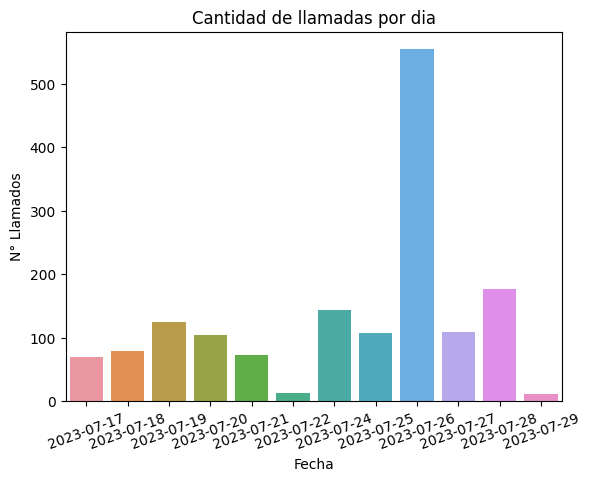

<Figure size 1000x900 with 0 Axes>

In [63]:
calls_per_day_data = calls_per_day.copy()

calls_plot = sns.barplot(x='FECHA_CREACION', y='N° Llamados',data=calls_per_day_data)
calls_plot.set_title("Cantidad de llamadas por dia")
calls_plot.set_xlabel("Fecha")
plt.xticks(rotation=20)
plt.figure(figsize = (10,9))

calls_plot.figure.savefig("calls_per_day.png", dpi=300)
plt.show()

### Grafico consultas/areas mas frecuentes

Al igual que la cantidad de llamados por dia, se agrupan en un nuevo Dataframe la cantidad de llamados que se tuvieron por carrera. Con estos datos se crea un grafico representativo

In [64]:
carrers_data = call_df.groupby(call_df['CARRERA']).size().reset_index(name='N° Llamados por Carrera')
carrers_data = carrers_data.sort_values(['N° Llamados por Carrera'], ascending=False)
carrers_data.head()

,CARRERA,N° Llamados por Carrera
32,INGENIERÍA EN INFORMÁTICA,246
14,GASTRONOMÍA INTERNACIONAL,221
29,INGENIERÍA EN COMERCIO EXTERIOR,162
44,TURISMO Y HOTELERÍA,119
13,ECOTURISMO,80


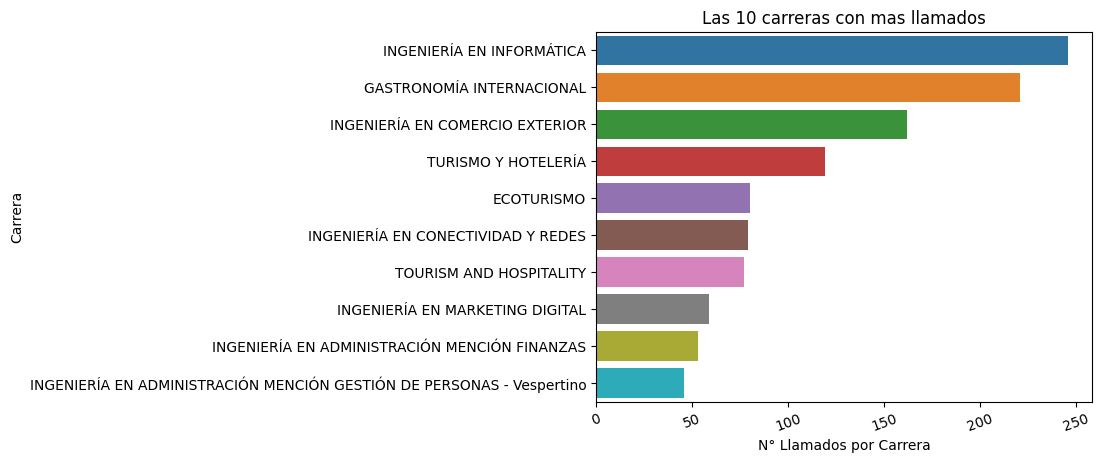

<Figure size 1200x900 with 0 Axes>

In [65]:
carrers_plot = sns.barplot(y='CARRERA', x='N° Llamados por Carrera',data=carrers_data.head(10))
carrers_plot.set_title("Las 10 carreras con mas llamados")
carrers_plot.set_ylabel("Carrera")
plt.xticks(rotation=20)
plt.figure(figsize = (12,9))

carrers_plot.figure.savefig("carrers_calls.png", dpi=300, bbox_inches='tight')
plt.show()

### Graficar consultas/areas mas frecuentes

Tambien se creo un Dataframe agrupando las areas de consultas designadas como "Nivel_1" en los datos para crear un grafico mostrando la cantidad de llamados por consulta/area

In [66]:
level_1 = call_df.groupby(call_df['NIVEL_1']).size().reset_index(name='N° Llamados')
level_1.head()

,NIVEL_1,N° Llamados
0,Académico,390
1,Financiamiento,279
2,Fuera de alcance,104
3,Gestión de abandono,3
4,Información general,92


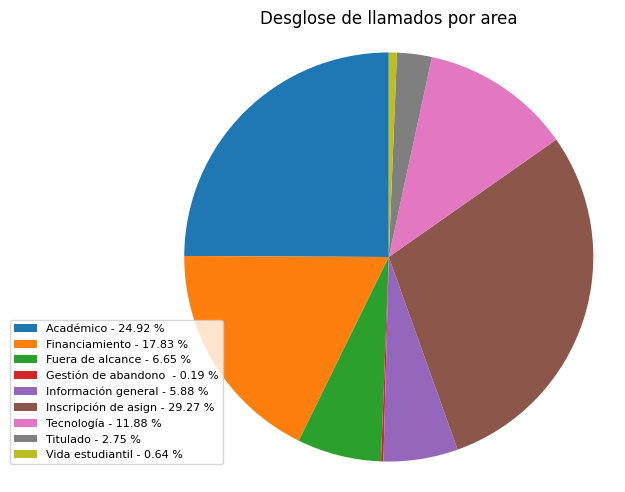

<Figure size 1000x900 with 0 Axes>

In [67]:
x = level_1["NIVEL_1"]
sizes = level_1["N° Llamados"]
percent = 100*sizes/sizes.sum()

fig, ax = plt.subplots()

patches, texts = plt.pie(sizes, startangle=90)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
plt.legend(patches, labels, loc='center', bbox_to_anchor=(-0.1, 0.2), fontsize=8)

plt.axis('equal')
plt.tight_layout()

plt.title("Desglose de llamados por area")
plt.figure(figsize = (10,9))
fig.savefig("calls_per_area.png", dpi=300, bbox_inches='tight')

plt.show()

### Graficar consultas/areas agrupadas por dia

Por ultimo, se agruparon el numero de llamados por area y la fecha. Para hacer un grafico de barras que desglose la cantidad de consultas de cada area por dia. Se puede notar que dia ocurrieron las inscripciones basada en el alto volumen de llamados y la cantidad de consultas sobre inscripcion, particularmente el 26, 27 y 28 de Julio.

In [68]:
grouped_calls = call_df.groupby([call_df['FECHA_CREACION'].dt.date, "NIVEL_1"]).size().reset_index(name='N° Llamados')
grouped_calls

,FECHA_CREACION,NIVEL_1,N° Llamados
0,2023-07-17,Académico,30
1,2023-07-17,Financiamiento,22
2,2023-07-17,Fuera de alcance,4
3,2023-07-17,Información general,4
4,2023-07-17,Inscripción de asign,3
...,...,...,...
82,2023-07-28,Titulado,1
83,2023-07-28,Vida estudiantil,1
84,2023-07-29,Académico,3
85,2023-07-29,Fuera de alcance,1


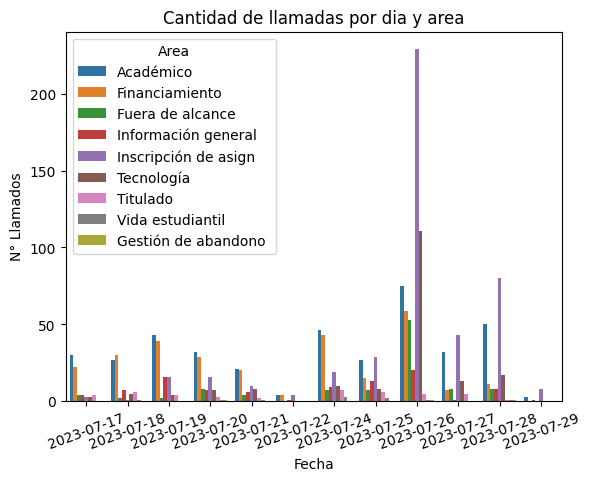

<Figure size 2000x2000 with 0 Axes>

In [69]:
grouped_calls_plot = sns.barplot(x='FECHA_CREACION', y='N° Llamados', data=grouped_calls, hue="NIVEL_1")
grouped_calls_plot.set_title("Cantidad de llamadas por dia y area")
grouped_calls_plot.set_xlabel("Fecha")
grouped_calls_plot.legend(title="Area")
plt.xticks(rotation=20)
plt.figure(figsize = (20,20))

grouped_calls_plot.figure.savefig("calls_per_day_area.png", dpi=600, bbox_inches='tight')
plt.show()

### Grafico comparacion entre casos resueltos y derivados

Los casos resueltos/derivados se encuentran en la columna "Nivel_4". Para poder hacer los graficos se crea un nuevo Dataframe agrupado por tipo de caso y el numero de casos.

In [70]:
cases_df = call_df.groupby(["NIVEL_4"]).size().reset_index(name="N° de casos")
cases_df

,NIVEL_4,N° de casos
0,Derivación CRM,2
1,Derivación G-Desk,29
2,Resolución en Sede,7
3,Resuelto,1517
4,Transferencia asistida TI,10


In [71]:
cases_df = cases_df.sort_values(['N° de casos'], ascending=False)
cases_df

,NIVEL_4,N° de casos
3,Resuelto,1517
1,Derivación G-Desk,29
4,Transferencia asistida TI,10
2,Resolución en Sede,7
0,Derivación CRM,2


Con estos datos se procede a hacer los respectivos graficos:

- Grafico de torta

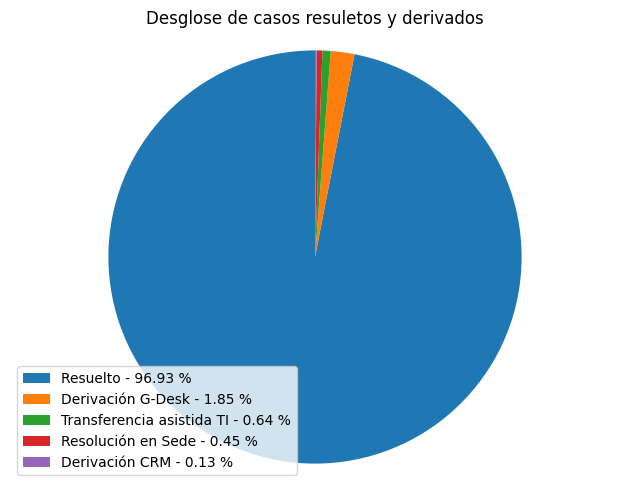

<Figure size 1000x900 with 0 Axes>

In [72]:
x = cases_df["NIVEL_4"]
sizes = cases_df["N° de casos"]
percent = 100.*sizes/sizes.sum()

pie, ax = plt.subplots()

patches, texts = plt.pie(sizes, startangle=90)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
plt.legend(patches, labels, loc="lower left")

plt.axis('equal')
plt.tight_layout()

plt.title("Desglose de casos resuletos y derivados")
plt.figure(figsize = (10,9))
pie.savefig("cases_resolved_pie.png", dpi=300, bbox_inches='tight')

plt.show()


- Grafico de Barras

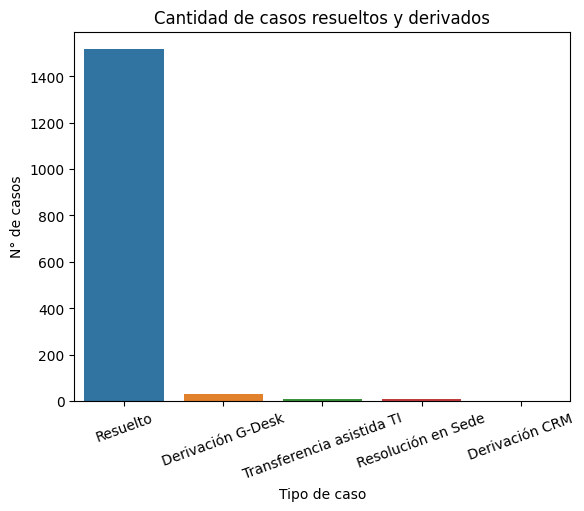

<Figure size 1000x900 with 0 Axes>

In [73]:
cases_plot = sns.barplot(x='NIVEL_4', y='N° de casos',data=cases_df)
cases_plot.set_title("Cantidad de casos resueltos y derivados")
cases_plot.set_xlabel("Tipo de caso")
plt.xticks(rotation=20)
plt.figure(figsize = (10,9))

cases_plot.figure.savefig("cases_bar.png", dpi=300)
plt.show()

- Grafico de barra agrupado por fecha

In [74]:
cases_days_df = call_df.groupby([call_df['FECHA_CREACION'].dt.date, "NIVEL_4"]).size().reset_index(name='N° Casos')
cases_days_df

,FECHA_CREACION,NIVEL_4,N° Casos
0,2023-07-17,Resolución en Sede,1
1,2023-07-17,Resuelto,69
2,2023-07-18,Derivación G-Desk,2
3,2023-07-18,Resuelto,77
4,2023-07-19,Resuelto,124
5,2023-07-20,Derivación G-Desk,2
6,2023-07-20,Resolución en Sede,1
7,2023-07-20,Resuelto,101
8,2023-07-21,Resuelto,72
9,2023-07-22,Resuelto,13


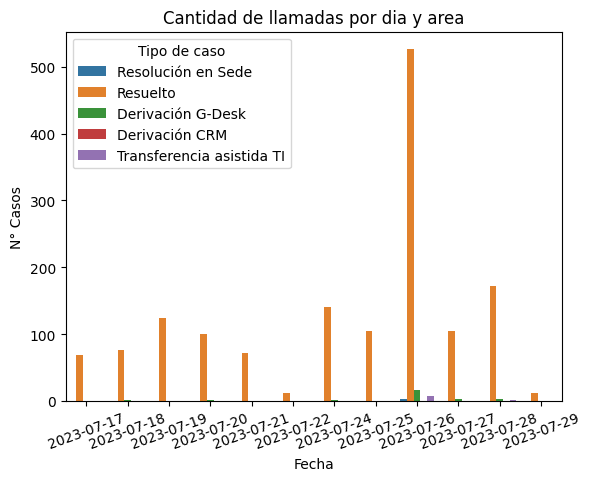

<Figure size 2000x2000 with 0 Axes>

In [75]:
grouped_cases_plot = sns.barplot(x='FECHA_CREACION', y='N° Casos', data=cases_days_df, hue="NIVEL_4")
grouped_cases_plot.set_title("Cantidad de llamadas por dia y area")
grouped_cases_plot.set_xlabel("Fecha")
grouped_cases_plot.legend(title="Tipo de caso", loc='upper left')
plt.xticks(rotation=20)
plt.figure(figsize = (20,20))

grouped_cases_plot.figure.savefig("cases_resolved_bar_days.png", dpi=600, bbox_inches='tight')
plt.show()